# Librerias

In [105]:
!pip install seaborn

In [3]:
import pandas as pd

In [93]:
import numpy as np

In [94]:
from dateutil import parser

In [98]:
import matplotlib.pyplot as plt

In [95]:
import seaborn as sns

# Importar Datos

In [9]:
!ls

crime.csv  Untitled.ipynb


In [6]:
datos = pd.read_csv('crime.csv')

In [71]:
datos['Year'] = datos['Month'].apply(lambda row: row.split('-')[0])

In [72]:
datos.head()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat,Year
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800.0,Other Assaults,NaN,2009-10,NaN,NaN,2009
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600.0,All Other Offenses,NaN,2009-05,NaN,NaN,2009
2,25,J,2009-08-07 15:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800.0,Other Assaults,NaN,2009-08,NaN,NaN,2009
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500.0,Weapon Violations,20.0,2009-07,-75.130477,40.036389,2009
4,9,R,2009-06-25 00:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600.0,All Other Offenses,8.0,2009-06,-75.166350,39.969532,2009


## Objetivo
#### Analizar los crímenes de filadelfia ocurridos dentro del periodo 2006 al 2017 mediante técnicas de data science para facilitar la  interpretación de los datos 

# Interrogantes a resolver 
### ¿ Cual es el crimen mas comun ?
### ¿ Cual es la localizacion mas criminalistica ?
### ¿ Cual es el fujo del crimen en el tiempo ? 
### ¿ Cual es el año con mas crimenes ?
### ¿ Cual es el intervalo de tiempo donde se cometen mas crimenes en el dia ?

In [10]:
grupoCrimenes = pd.DataFrame({'count' : datos.groupby( ['UCR_General', 'Text_General_Code'] ).size()}).reset_index()

In [11]:
conteoMaximoCrimenes = grupoCrimenes['count'].max()

In [12]:
grupoCrimenes.head()

,UCR_General,Text_General_Code,count
0,100.0,Homicide - Criminal,3442
1,100.0,Homicide - Gross Negligence,12
2,100.0,Homicide - Justifiable,42
3,200.0,Rape,11852
4,300.0,Robbery Firearm,40577


In [13]:
conteoMaximoCrimenes

437581

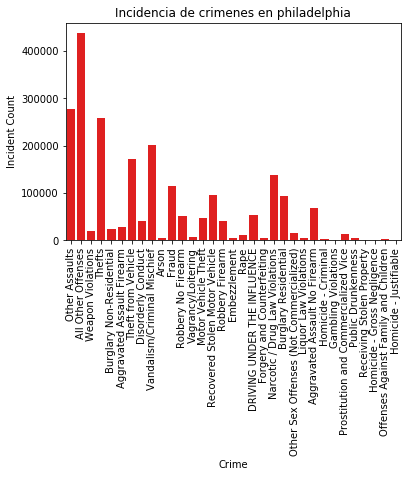

In [120]:
# Which crimes are most frequently committed?
sns.countplot(datos['Text_General_Code'], color='red')
plt.title("Incidencia de crimenes en philadelphia")
plt.xlabel("Crime")
plt.ylabel("Incident Count")
plt.xticks(rotation=90)
plt.show()

### ¿ Cual es el crimen mas comun ?

In [14]:
grupoCrimenes[grupoCrimenes['count'] == conteoMaximoCrimenes]

,UCR_General,Text_General_Code,count
32,2600.0,All Other Offenses,437581


### ¿ Cual es la localizacion mas criminalistica ?

In [15]:
grupoDistrito = pd.DataFrame({'count' : datos.groupby( ['Dc_Dist'] ).size()}).reset_index()

In [16]:
conteoMaximoDistrito = grupoDistrito['count'].max()

In [17]:
grupoDistrito[grupoDistrito['count'] == conteoMaximoDistrito]

,Dc_Dist,count
11,15,184677


### Cordenadas de la zona mas criminalistica

In [18]:
distrito = datos[datos['Dc_Dist'] == 15]

### longitud

In [19]:
distrito['Lon'].min()

-75.238342000000003

### Latitud

In [20]:
distrito['Lat'].max()

40.100821999999994

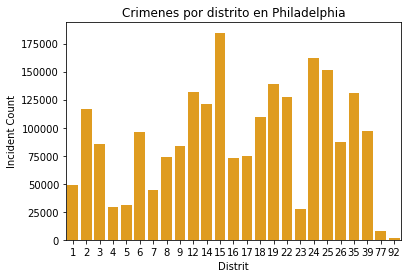

In [110]:
sns.countplot(datos['Dc_Dist'], color='orange')
plt.title("Crimenes por distrito en Philadelphia")
plt.xlabel("Distrit")
plt.ylabel("Incident Count")
plt.show()

## El anio con mas crimenes

In [74]:
grupoAnio = pd.DataFrame({'count' : datos.groupby( ['Year']).size()}).reset_index()

In [80]:
conteoCrimenesAnio = grupoAnio['count'].max()

In [81]:
grupoAnio[grupoAnio['count'] == conteoCrimenesAnio]

,Year,count
0,2006,234755


In [85]:
crimenesPorAnio = datos.groupby(['Year']).size()

In [86]:
crimenesPorAnio

Year
2006    234755
2007    223902
2008    223735
2009    205044
2010    199415
2011    195521
2012    196755
2013    186489
2014    186146
2015    183300
2016    169101
2017     33442
dtype: int64

In [88]:
%matplotlib inline

## ¿ Cual es el fujo del crimen en el tiempo ?

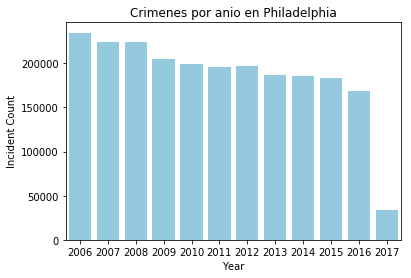

In [104]:
sns.countplot(datos['Year'], color='skyblue')
plt.title("Crimenes por anio en Philadelphia")
plt.xlabel("Year")
plt.ylabel("Incident Count")
plt.show()

## ¿ Cual es el intervalo de tiempo donde se cometen mas crimenes en el dia ?

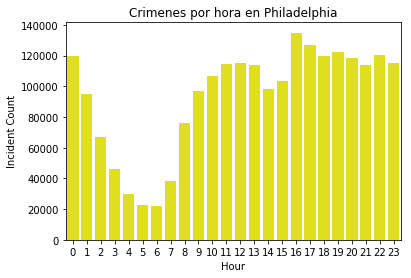

In [107]:
sns.countplot(datos['Hour'], color='yellow')
plt.title("Crimenes por hora en Philadelphia")
plt.xlabel("Hour")
plt.ylabel("Incident Count")
plt.show()